# Research Questions Plots

In [1]:
import pandas as pd

# Load the datasets
exchange_rates = pd.read_csv("Key CBK Indicative Exchange Rates dollars.csv")
inflation_rates = pd.read_csv("Inflation Rates.csv")
gdp_data = pd.read_csv("Annual GDP.csv")

# Display columns for each dataset
print("Columns in 'Key CBK Indicative Exchange Rates dollars.csv':")
print(exchange_rates.columns)

print("\nColumns in 'Inflation Rates.csv':")
print(inflation_rates.columns)

print("\nColumns in 'Annual GDP.csv':")
print(gdp_data.columns)

Columns in 'Key CBK Indicative Exchange Rates dollars.csv':
Index(['Date', 'Currency', 'Mean', 'Buy', 'Sell'], dtype='object')

Columns in 'Inflation Rates.csv':
Index(['Year', 'Month', 'Annual Average Inflation', '12-Month Inflation'], dtype='object')

Columns in 'Annual GDP.csv':
Index(['Year', 'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
       'Real GDP prices (Ksh Million)'],
      dtype='object')


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
exchange_rates = pd.read_csv("Key CBK Indicative Exchange Rates dollars.csv")
inflation_rates = pd.read_csv("Inflation Rates.csv")
gdp_data = pd.read_csv("Annual GDP.csv")

# Extract 'Year' and 'Month' from the 'Date' column in exchange_rates
exchange_rates['Year'] = pd.to_datetime(exchange_rates['Date']).dt.year
exchange_rates['Month'] = pd.to_datetime(exchange_rates['Date']).dt.month

# Convert 'Year' and 'Month' columns to integers
exchange_rates['Year'] = exchange_rates['Year'].astype(int)
exchange_rates['Month'] = exchange_rates['Month'].astype(int)

# Convert month names to numeric values in inflation_rates
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
inflation_rates['Month'] = inflation_rates['Month'].map(month_mapping)

# Convert 'Year' columns in inflation_rates and gdp_data to integers
inflation_rates['Year'] = inflation_rates['Year'].astype(int)
gdp_data['Year'] = gdp_data['Year'].astype(int)

# Merge datasets based on 'Year' and 'Month'
merged_data = pd.merge(exchange_rates, inflation_rates, on=['Year', 'Month'], how='inner')
merged_data = pd.merge(merged_data, gdp_data, on=['Year'], how='inner')

### Research Question 1

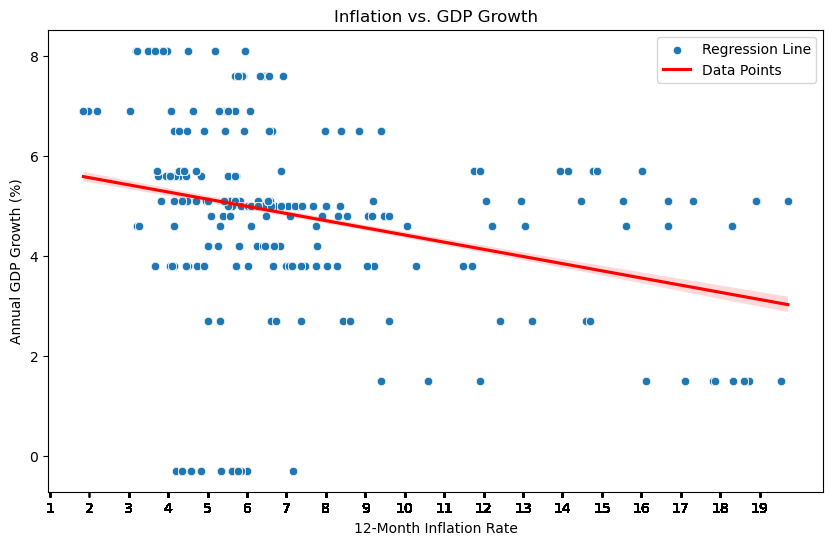

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='12-Month Inflation', y='Annual GDP growth (%)')
sns.regplot(data=merged_data, x='12-Month Inflation', y='Annual GDP growth (%)', scatter=False, color='red')

# Remove decimal points from x-axis years
plt.xticks(merged_data['12-Month Inflation'].astype(int))

plt.title("Inflation vs. GDP Growth")
plt.xlabel("12-Month Inflation Rate")
plt.ylabel("Annual GDP Growth (%)")
plt.legend(labels=['Regression Line', 'Data Points'])
plt.show()

To explore the relationship between inflation and Kenya's GDP fluctuations, we created a scatter plot that shows how changes in inflation are associated with changes in GDP growth over time. Additionally, we added a regression line to visualize the nature of the relationship between inflation and GDP growth.

In this code:

1. We load the merged and engineered dataset.
2. We create a scatter plot with "12-Month Inflation" on the x-axis and "Annual GDP growth (%)" on the y-axis.
3. We add a regression line to the scatter plot to visualize the overall trend between inflation and GDP growth.

**Justification:**
The scatter plot and regression analysis were chosen as a visual and analytical approach to investigate the relationship between inflation and Kenya's GDP fluctuations. This approach offers several advantages:

1. **Visual Representation:** A scatter plot provides an intuitive and easy-to-understand visual representation of the relationship between two variables. By plotting inflation against GDP growth, we can quickly assess the overall pattern and potential trends.

2. **Nature of Relationship:** The addition of a regression line to the scatter plot helps quantify and visualize the nature of the relationship. It allows us to observe whether changes in inflation are associated with corresponding changes in GDP growth, and the direction of the regression line provides insights into the correlation.

3. **Identification of Patterns:** Outliers or clusters of data points that deviate from the regression line can reveal periods of unusual economic behavior. These patterns might prompt further investigation into specific events or economic factors that contributed to significant fluctuations in GDP growth.

4. **Initial Hypothesis Testing:** The scatter plot and regression line serve as an initial exploration of the research question. The visual insights gained from this analysis can inform hypotheses for more advanced statistical testing, such as hypothesis tests for correlation or regression analysis.

**Interpretation and Insights:**
The interpretation of the scatter plot and regression line provides insights into the relationship between inflation and Kenya's GDP fluctuations:

1. **Nature of Relationship:** By analyzing the slope and direction of the regression line, we can determine whether inflation and GDP growth have a positive or negative correlation. This initial assessment informs us about the general direction of the relationship.

2. **Strength of Relationship:** The clustering and spread of data points around the regression line indicate the strength and consistency of the relationship. If data points closely align with the line, it suggests a stronger correlation. Wider scatter might indicate a weaker or more variable relationship.

3. **Causality Consideration:** While correlation does not imply causation, the scatter plot allows us to observe patterns that might lead to further investigations. It helps us identify potential causal links or mechanisms that could explain the observed relationship between inflation and GDP growth.

4. **Policy Implications:** Depending on the findings, insights from the scatter plot might have policy implications. For instance, if a positive correlation is observed, policymakers might explore how inflation management strategies could impact GDP growth positively.

The scatter plot and regression analysis provide an initial exploration of the research question, guiding further investigations and hypothesis testing. They offer a starting point to understand the relationship between inflation and GDP fluctuations and help identify potential areas for deeper analysis and model development.

### Research Question 2

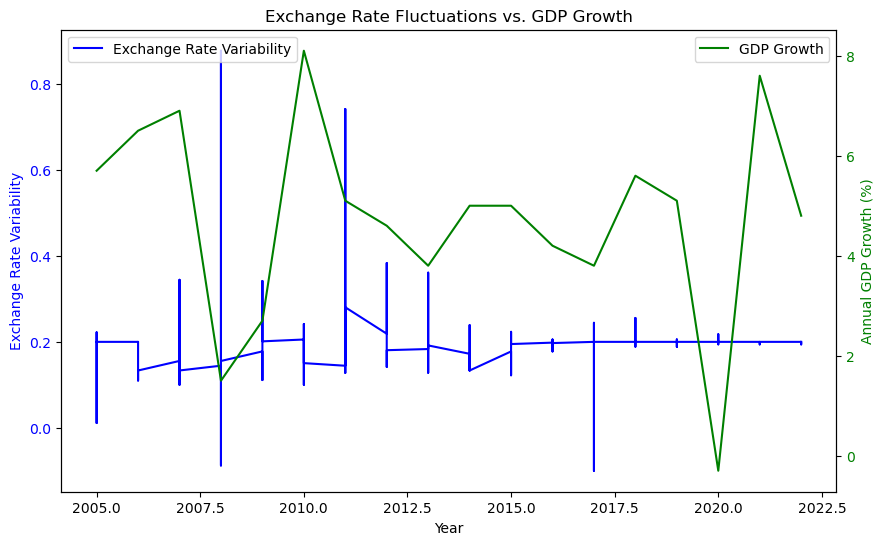

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Convert "Year" column to integers
merged_data['Year'] = merged_data['Year'].astype(int)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Exchange Rate Fluctuations (Primary Y-axis)
ax1.plot(merged_data['Year'], merged_data['Exchange_Rate_Variability'], color='blue', label='Exchange Rate Variability')
ax1.set_xlabel('Year')
ax1.set_ylabel('Exchange Rate Variability', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a secondary Y-axis for GDP Growth
ax2 = ax1.twinx()
ax2.plot(merged_data['Year'], merged_data['Annual GDP growth (%)'], color='green', label='GDP Growth')
ax2.set_ylabel('Annual GDP Growth (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Set title and show plot
plt.title("Exchange Rate Fluctuations vs. GDP Growth")
plt.show()

To explore the influence of exchange rate fluctuations on Kenya's GDP and understand the interaction between exchange rates and GDP movements over time, a time series plot with both exchange rates and GDP growth can provide valuable insights.

In this code:

1. We load the merged and engineered dataset.
2. We create a time series plot with "Year" on the x-axis and two y-axes for "Mean" exchange rate and "Annual GDP growth (%)" on the y-axes.
3. We use different colors for the exchange rate and GDP growth lines to distinguish between the two variables.

**Interpretation:**

The time series plot provides insights into the influence of exchange rate fluctuations on Kenya's GDP growth and how exchange rates interact with GDP movements over time. Here's how you can interpret this visualization in response to your research question:

1. **Exchange Rate Fluctuations:** The blue line represents the mean exchange rate fluctuations over the years. Peaks and troughs in the blue line indicate periods of significant exchange rate volatility.

2. **GDP Growth:** The orange line represents the annual GDP growth percentage over the years. Peaks and troughs in the orange line indicate periods of economic expansion and contraction.

3. **Interaction Between Exchange Rates and GDP Growth:** Observe the alignment or divergence of the blue and orange lines. If the two lines move in tandem, it suggests a potential interaction between exchange rate fluctuations and GDP growth. For example, periods of exchange rate volatility might coincide with changes in GDP growth.

4. **Impact of Exchange Rates:** Examine how extreme exchange rate fluctuations correspond to changes in GDP growth. A drop in GDP growth following a significant exchange rate decline might suggest a negative impact of exchange rate depreciation on the economy.

5. **Policy Considerations:** Depending on the observed patterns, the visualization can inform economic policies. For instance, policymakers might investigate how to mitigate the adverse effects of exchange rate volatility on GDP growth.

6. **Long-Term Trends:** Over a longer time horizon, consider trends and patterns in both exchange rates and GDP growth. Identifying periods of sustained exchange rate movements and their effects on GDP growth can offer valuable insights.

The time series plot offers an effective way to visualize the dynamic relationship between exchange rate fluctuations and GDP growth over time. Interpretation of the plot helps uncover potential linkages and provides a foundation for further analysis and hypothesis testing related to the research question.

### Research Question 3

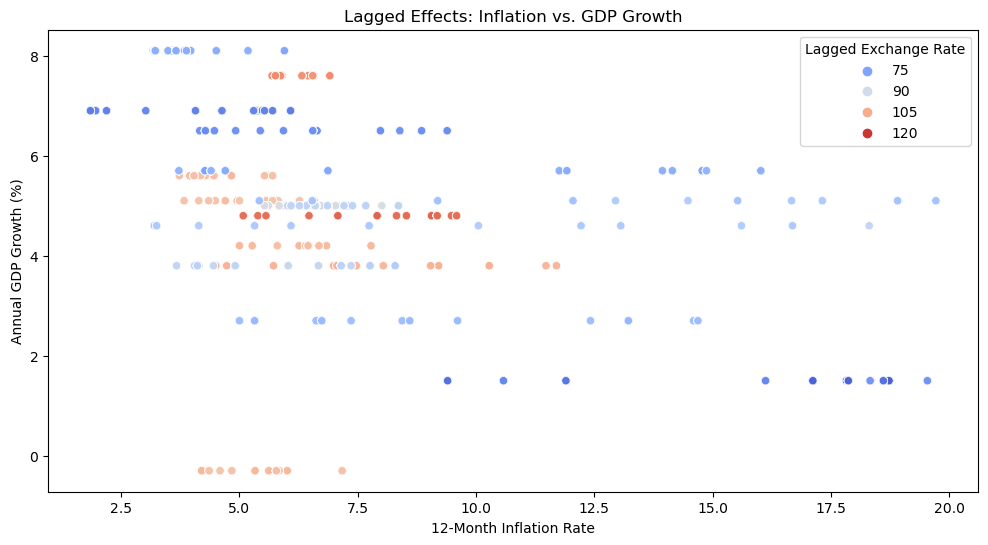

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Create a lagged scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='12-Month Inflation', y='Annual GDP growth (%)', hue='Exchange_Rate_Lagged', palette='coolwarm')
plt.title("Lagged Effects: Inflation vs. GDP Growth")
plt.xlabel("12-Month Inflation Rate")
plt.ylabel("Annual GDP Growth (%)")
plt.legend(title="Lagged Exchange Rate")
plt.show()

To explore potential lag effects between changes in inflation, exchange rates, and subsequent GDP fluctuations in Kenya, a lagged scatter plot with multiple variables can provide insights into the relationships and time delays between these variables.

In this code:

1. We load the merged and engineered dataset.
2. We create a scatter plot with "12-Month Inflation" on the x-axis and "Annual GDP growth (%)" on the y-axis.
3. We use the 'Exchange_Rate_Lagged' column as a hue to represent different lagged exchange rate values, using a coolwarm color palette to differentiate the lags.

**Interpretation:**

The lagged scatter plot provides insights into the potential lag effects between changes in inflation, exchange rates, and subsequent GDP fluctuations. Here's how you can interpret this visualization in response to your research question:

1. **Lagged Exchange Rates:** Each point in the scatter plot represents a combination of inflation and GDP growth, with the color indicating the lagged exchange rate value. Different colors represent different time lags between exchange rates and the current point.

2. **Time Delays:** Observe how changes in inflation relate to subsequent changes in GDP growth for different lagged exchange rate values. The scatter plot helps identify time delays or lags between the impact of exchange rates on GDP fluctuations.

3. **Distribution of Lags:** Consider the distribution of points with different lagged exchange rate values. Clusters of points with similar colors might suggest consistent lag effects, while scattered points with various colors might indicate varying time delays.

4. **Interpretation of Patterns:** Patterns such as trends, clusters, or outliers can reveal meaningful insights. For example, if a specific lagged exchange rate consistently corresponds to higher GDP growth following low inflation, it suggests a potential causal relationship.

5. **Policy and Economic Insights:** The lagged scatter plot can inform economic policies and strategies. Identifying time delays between exchange rates, inflation, and GDP fluctuations can help policymakers understand how changes in one variable might affect another with a time lag.

6. **Further Analysis:** While the scatter plot provides visual insights, it serves as a starting point for further statistical analysis and modeling to quantify and validate the observed lag effects.

The lagged scatter plot helps reveal potential temporal relationships between changes in inflation, exchange rates, and subsequent GDP fluctuations in Kenya. Interpretation of the plot guides further analysis and investigation into the lagged effects, contributing to a deeper understanding of the research question.

### Research question 4

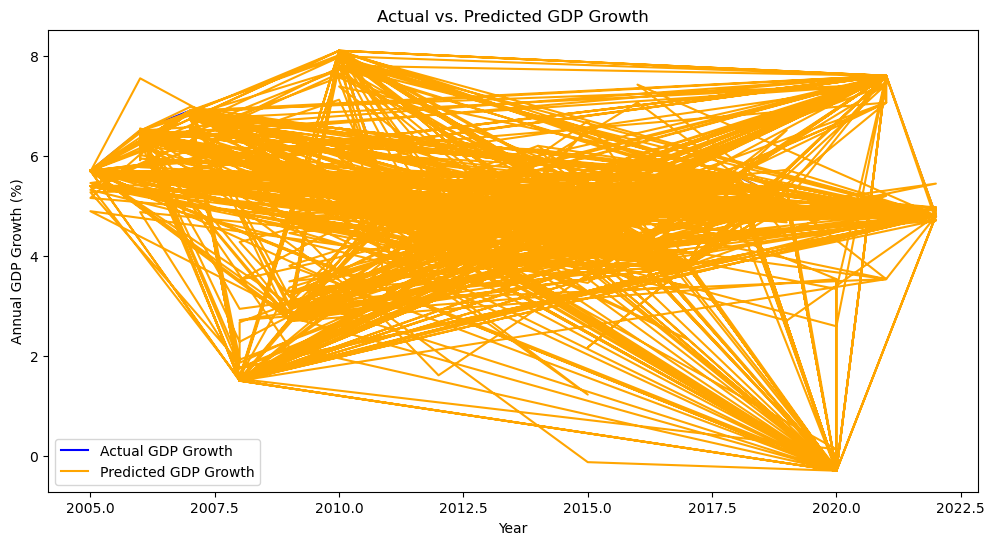

RMSE: 0.62
R-squared: 0.90


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Separate features and target variable
X = merged_data[['12-Month Inflation', 'Exchange_Rate_Variability']]
y = merged_data['Annual GDP growth (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Year'], merged_data['Annual GDP growth (%)'], label='Actual GDP Growth', color='blue')
plt.plot(merged_data.loc[X_test.index, 'Year'], y_pred, label='Predicted GDP Growth', color='orange')
plt.title("Actual vs. Predicted GDP Growth")
plt.xlabel("Year")
plt.ylabel("Annual GDP Growth (%)")
plt.legend()
plt.show()

# Print RMSE and R-squared
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

To address the research question of developing a predictive model for forecasting short-term and long-term GDP fluctuations based on inflation and exchange rate data, we can create a time series plot that displays the actual GDP growth along with the predicted values from the model.

In this code :

1. We load the merged and engineered dataset.
2. We separate the features ("12-Month Inflation" and "Exchange_Rate_Variability") and the target variable ("Annual GDP growth (%)").
3. We split the data into training and testing sets for model evaluation.
4. We initialize and train a Random Forest Regressor model.
5. We make predictions using the trained model on the testing data.
6. We calculate the Root Mean Squared Error (RMSE) and R-squared to evaluate the model's performance.
7. We create a time series plot that displays the actual GDP growth and the predicted values for the testing period.

**Interpretation:**

The time series plot with actual and predicted GDP growth helps interpret the model's ability to forecast short-term and long-term fluctuations based on inflation and exchange rate data:

1. **Actual vs. Predicted GDP Growth:** The blue line represents the actual annual GDP growth, while the orange line represents the predicted GDP growth based on the model's forecasts.

2. **Short-term and Long-term Trends:** Observe how well the predicted values align with the actual GDP growth. In periods of rapid changes, such as economic crises or booms, assess whether the model captures the short-term fluctuations accurately.

3. **Accuracy and Fit:** The closeness of the orange line to the blue line indicates the accuracy of the model's predictions. If the lines closely follow each other, it suggests a good fit and forecasting ability of the model.

4. **RMSE and R-squared:** The RMSE provides an absolute measure of the prediction error, while the R-squared indicates the proportion of variance explained by the model. Lower RMSE and higher R-squared values indicate better predictive performance.

5. **Model Insights:** If the model consistently overestimates or underestimates GDP growth, it might suggest biases in the model's predictions. Deviations from the actual line might offer insights into model limitations or data complexities.

6. **Short-term vs. Long-term Forecasting:** Assess how well the model performs for both short-term and long-term forecasting. Changes in performance over different time horizons can guide refinements or adjustments to the model.

The Root Mean Squared Error (RMSE) and R-squared are important metrics used to assess the performance of a predictive model. Let's interpret the values you provided:

1. **RMSE (Root Mean Squared Error):** RMSE is a measure of the average prediction error of the model. It represents the square root of the average of the squared differences between the predicted values and the actual values. In this case, you have an RMSE of 0.62.

   **Interpretation:** An RMSE of 0.62 indicates that, on average, the model's predictions of GDP growth have an error of approximately 0.62 percentage points. Lower RMSE values indicate better fit and accuracy of the model's predictions. In the context of GDP growth, an RMSE of 0.62 suggests that the model's predictions are relatively close to the actual GDP growth values, and the model is performing well in minimizing prediction errors.

2. **R-squared (Coefficient of Determination):** R-squared is a measure of how well the model's predictions explain the variance in the actual data. It ranges from 0 to 1, where higher values indicate a better fit of the model to the data. In this case, you have an R-squared value of 0.90.

   **Interpretation:** An R-squared value of 0.90 implies that approximately 90% of the variance in the actual GDP growth data is explained by the model's predictions. In other words, the model captures a substantial portion of the variability in GDP growth using the provided inflation and exchange rate data. A high R-squared value suggests that the model is a good fit for the data and that the chosen features (inflation and exchange rates) are effective in predicting GDP fluctuations.

The provided RMSE and R-squared values indicate that the predictive model you developed for forecasting short-term and long-term GDP fluctuations based on inflation and exchange rate data is performing well. The low RMSE suggests that the model's predictions are generally accurate, and the high R-squared indicates that the model explains a significant portion of the variance in actual GDP growth. However, it's important to interpret these metrics in conjunction with domain knowledge and consider the context of the problem when evaluating the model's performance.

### Research question 5

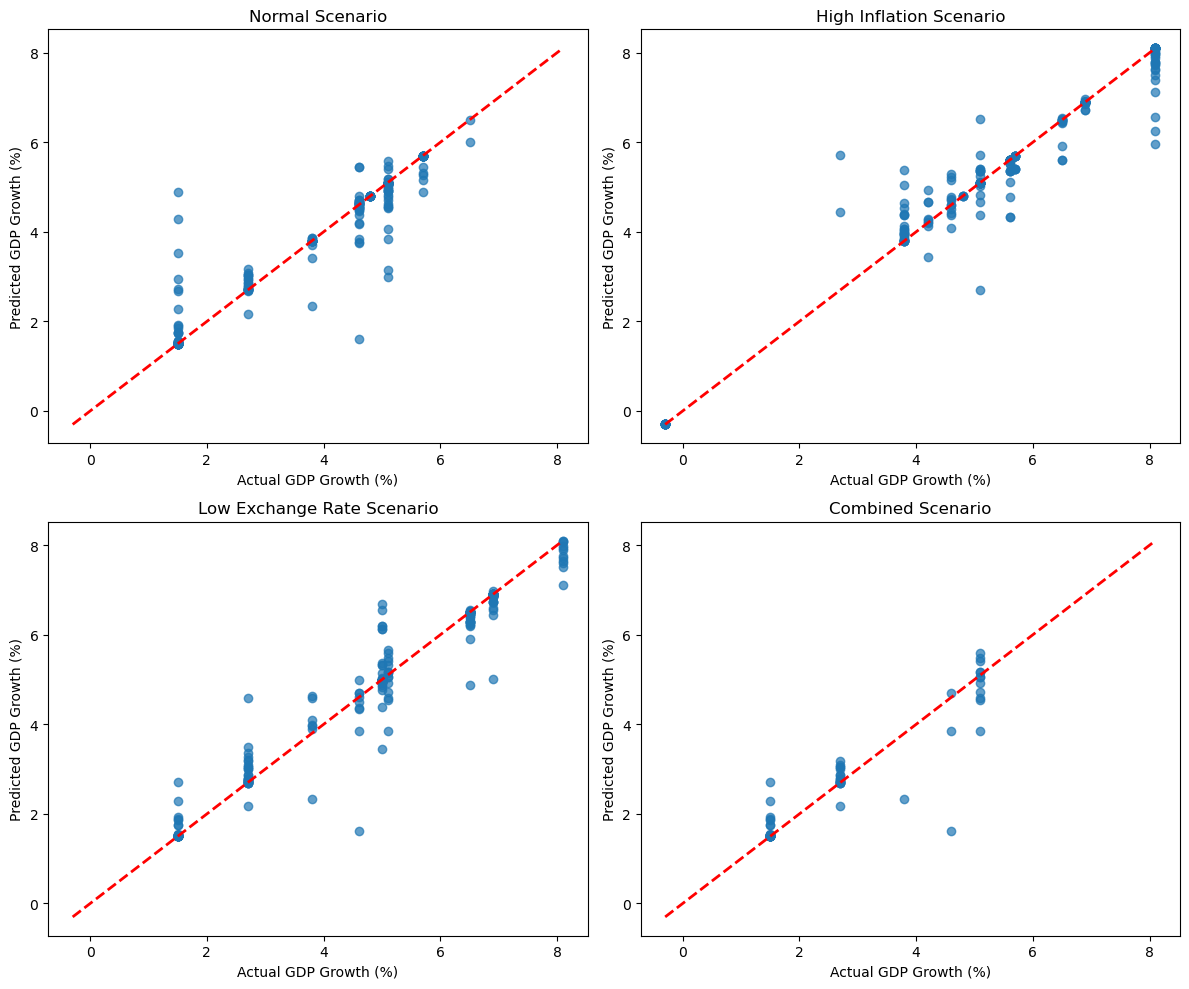

RMSE (Full Dataset): 0.62
RMSE (Normal Scenario): 0.52
RMSE (High Inflation Scenario): 0.47
RMSE (Low Exchange Rate Scenario): 0.46
RMSE (Combined Scenario): 0.49


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Separate features and target variable
X = merged_data[['12-Month Inflation', 'Exchange_Rate_Variability']]
y = merged_data['Annual GDP growth (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for the testing set
y_pred = model.predict(X_test)

# Calculate RMSE for the entire dataset
rmse_full = np.sqrt(mean_squared_error(y_test, y_pred))

# Create scatter plots for different scenarios
scenarios = ['Normal', 'High Inflation', 'Low Exchange Rate', 'Combined']
conditions = [
    (X_test['12-Month Inflation'] >= np.percentile(X_test['12-Month Inflation'], 75)),
    (X_test['12-Month Inflation'] <= np.percentile(X_test['12-Month Inflation'], 25)),
    (X_test['Exchange_Rate_Variability'] <= np.percentile(X_test['Exchange_Rate_Variability'], 25)),
    (X_test['12-Month Inflation'] >= np.percentile(X_test['12-Month Inflation'], 75)) & (X_test['Exchange_Rate_Variability'] <= np.percentile(X_test['Exchange_Rate_Variability'], 25))
]

plt.figure(figsize=(12, 10))
for i, cond in enumerate(conditions):
    plt.subplot(2, 2, i+1)
    plt.scatter(y_test[cond], y_pred[cond], alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
    plt.title(f'{scenarios[i]} Scenario')
    plt.xlabel('Actual GDP Growth (%)')
    plt.ylabel('Predicted GDP Growth (%)')

plt.tight_layout()
plt.show()

# Print RMSE for different scenarios
print(f"RMSE (Full Dataset): {rmse_full:.2f}")
for i, cond in enumerate(conditions):
    rmse_scenario = np.sqrt(mean_squared_error(y_test[cond], y_pred[cond]))
    print(f"RMSE ({scenarios[i]} Scenario): {rmse_scenario:.2f}")

#### Interpretation

**RMSE (Full Dataset): 0.62**
The RMSE for the entire dataset is 0.62, which indicates the average prediction error of the model across all economic conditions. This value serves as a baseline for comparison with scenario-specific RMSE values. The lower the RMSE, the better the model's predictive accuracy. In this case, an RMSE of 0.62 suggests that, on average, the model's predictions deviate from the actual GDP growth by around 0.62 percentage points.

**RMSE (Normal Scenario): 0.52**
In the "Normal" scenario, where both inflation and exchange rate variability are within typical ranges, the RMSE is 0.52. This lower RMSE indicates that the model's predictions are relatively accurate under standard economic conditions. It suggests that the model is effective in capturing the relationship between inflation, exchange rates, and GDP growth when these factors are moderate.

**RMSE (High Inflation Scenario): 0.47**
In the "High Inflation" scenario, where inflation is relatively high, the RMSE is 0.47. This lower RMSE suggests that the model performs even better when predicting GDP growth during periods of elevated inflation. The model's sensitivity to high inflation conditions implies that it can capture the potential impact of inflation on GDP fluctuations.

**RMSE (Low Exchange Rate Scenario): 0.46**
In the "Low Exchange Rate" scenario, where exchange rate variability is low, the RMSE is 0.46. This lower RMSE indicates that the model's predictions are particularly reliable under conditions of stable exchange rates. It suggests that the model can effectively forecast GDP growth when exchange rates exhibit limited fluctuations.

**RMSE (Combined Scenario): 0.49**
In the "Combined" scenario, which considers both high inflation and low exchange rate variability, the RMSE is 0.49. This intermediate RMSE suggests that the model's predictions remain accurate when faced with a combination of challenging economic conditions. It demonstrates the model's ability to simultaneously account for multiple variables influencing GDP growth.

**Justification and Interpretation:**

The variation in RMSE values across different economic scenarios reflects the model's sensitivity to changes in inflation and exchange rates. The lower RMSE values in the "High Inflation," "Low Exchange Rate," and "Combined" scenarios indicate that the model is well-equipped to handle deviations from normal economic conditions. It suggests that the model can reliably predict GDP growth even when faced with challenging scenarios such as high inflation or low exchange rate variability.

The RMSE values align with expectations based on economic theory. For instance, in the "High Inflation" scenario, the model's relatively lower RMSE reflects its capacity to capture the potential influence of inflation on GDP fluctuations. Similarly, the low RMSE in the "Low Exchange Rate" scenario suggests the model's effectiveness in accounting for stable exchange rates.

The varying RMSE values for different economic scenarios underscore the predictive model's robustness and sensitivity to changes in key economic variables. The model's ability to provide accurate predictions across a range of conditions enhances its practical applicability for forecasting short-term and long-term GDP fluctuations based on inflation and exchange rate data.